`machine learning course 2025 (с) mssvctr`

### Домашнее задание 1

**Titanic challenge** - самое известное соревнование по Data Science

Используйте данные о пассажирах Титаника, чтобы построить свой классификатор, который предсказывает вероятность гибели пассажира на печально известном корабле

#### Шаг 1: импорт библиотек

Заполните плейсхолдеры

In [437]:
# импортируйте pandas, numpy, seaborn и matplotlib
# не забывайте о том, что каждая из этих библиотек
# использует свои сокращения

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# далее мы импортируем миллион методов из scikit-learn
# эта часть уже выполнена, ура!

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Шаг 2: загружаем данные с Титаника

In [438]:
# выгрузим датасет напрямую с URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# выведите первые 5 строк датасета
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Шаг 3: анализ данных

Опишите данные и укажите в комментариях к коду ответы на вопросы:

1. выведите df.info()
  - в каких столбцах есть NaN'ы?
  - ориентируясь на количество NaN'ов в столбцах, определите, какие строки "не жалко" выбросить, а какие лучше сохранить
2. визуализируйте распределение классов по столбцу `Survived`
  - сбалансировали ли классы в нашем датасете?
3. выведите список столбцов, в которых представлены категориальные данные
  - почему категориальные данные нужно будет обработать перед запуском обучения модели?

In [439]:
df.info() #NaN'ы есть в Age, Cabin, Embarked. Cabin можно выбросить, много NaN'ов. Age и Embarked лучше сохранить.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


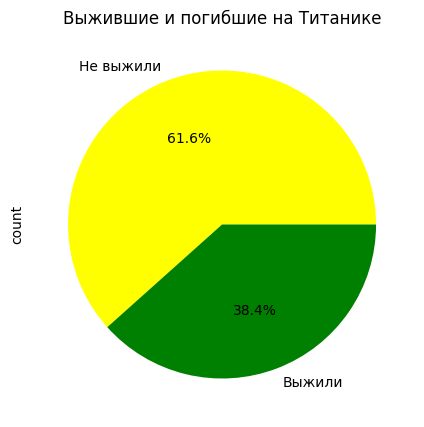

In [386]:
plt.figure(figsize=(5, 5))
df['Survived'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['yellow', 'green'],
    labels=['Не выжили', 'Выжили'])
plt.title('Выжившие и погибшие на Титанике')
plt.show()

#классы не сбалансированы, выживших меньше погибших

In [440]:
df[['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked', 'SibSp', 'Parch', 'Fare']].head()

,Survived,Pclass,Sex,Cabin,Embarked,SibSp,Parch,Fare
0,0,3,male,NaN,S,1,0,7.2500
1,1,1,female,C85,C,1,0,71.2833
2,1,3,female,NaN,S,0,0,7.9250
3,1,1,female,C123,S,1,0,53.1000
4,0,3,male,NaN,S,0,0,8.0500


#### Шаг 4: анализ данных

Ответы на эти вопросы помогут вам принять решения для препроцессинга данных:

- требуется ли балансировка классов?
- какие столбцы нужно дропнуть?
- какие данные нужно преобразовать к виду числовых?

**Дропаем столбцы**

Оставим классы в покое и сразу перейдем к очистке таблицы

Есть два пути:

- дропнуть "лишние" столбцы из исходной таблицы
- создать новую таблицу, в которую мы занесем только "нужные" столбцы

Выберите любой способ и создайте новый датафрейм, очищенный от неинформативных столбцов, в которых много NaN'ов

In [441]:
df = df[['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Name']] #сохраним name, чтобы можно было в дальнейшем работать с этой категорией
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Name
0,0,male,22.0,1,0,7.2500,S,"Braund, Mr. Owen Harris"
1,1,female,38.0,1,0,71.2833,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,female,26.0,0,0,7.9250,S,"Heikkinen, Miss. Laina"
3,1,female,35.0,1,0,53.1000,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,male,35.0,0,0,8.0500,S,"Allen, Mr. William Henry"


In [389]:
"""
ПРИМЕР ОЧИЩЕННОЙ ТАБЛИЦЫ
"""

'\nПРИМЕР ОЧИЩЕННОЙ ТАБЛИЦЫ\n'

**Categorical --> Numerical**

Для преобразования категориальных данных к виду чисел, в sklearn используется метод `LabelEncoder`

- документация [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

Метод автоматически заменяет категориальные метки на целые числа

In [434]:
# образец кодирования столбца 'Sex' с LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 0 = female, 1 = male
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Name
0,0,1,22.0,1,0,7.2500,S,"Braund, Mr. Owen Harris"
1,1,0,38.0,1,0,71.2833,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,0,26.0,0,0,7.9250,S,"Heikkinen, Miss. Laina"
3,1,0,35.0,1,0,53.1000,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,1,35.0,0,0,8.0500,S,"Allen, Mr. William Henry"


Рассмотрим еще один метод: мы имитируем one-hot encoding с помощью метода `get_dummies` из Pandas

- [документация метода](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

Принцип работы one-hot-encoding:

- как мы закодируем цифры 1 и 9, чтобы получить разреженный массив?
- создаем матрицу из двух векторов размерностью 10
  ```
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] # цифра 1
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] # цифра 9
  ```
- единица означает позицию цифры в ряде `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`
- также:
  - единица означает `True` (число находится в этой позиции)
  - ноль означает `False` (число не находится в этой позиции)

При использовании этого метода в датафреймах, мы также создаем три новых столбца (три новых вектора), в которых помечаем `True` соответствие данной метке

In [435]:
# образец кодирования столбца 'Embarked' с get_dummies
# в Embarked у нас три метки: C, Q, S
# метки означают станцию посадки данного пассажира
df = pd.get_dummies(df, columns=['Embarked'])  # one-hot encoding
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Name,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",False,False,True
1,1,0,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,False,False
2,1,0,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",False,False,True
3,1,0,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,False,True
4,0,1,35.0,0,0,8.0500,"Allen, Mr. William Henry",False,False,True


Теперь обновите ваш датафрейм: замените с использованием изученных методов категориальные данные на числовые

Изучите документацию и найдите дополнительные материалы, ответьте на вопрос: чем `LabelEncoder` отличается от `get_dummies` и когда какой метод лучше использовать?

In [442]:
#label encoder преобразует категории в числа и лучше всего подходит для бинарных данных (как male - 1, female - 0) и тех, где важен порядок
#get_dummies преобразует категории в "столбцы" как в one-hot-encoding, лучше интерпретируется моделью, но занимает гораздо больше места, и подходит для данных, где меньше классов и порядок не важен
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'])
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Name,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",False,False,True
1,1,0,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,False,False
2,1,0,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",False,False,True
3,1,0,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,False,True
4,0,1,35.0,0,0,8.0500,"Allen, Mr. William Henry",False,False,True


**Заполняем пропуски**

Мы убрали лишние столбцы, но NaN'ы по-прежнему есть в нашем датафрейме

Рассмотрим метод `SimpleImputer` из sklearn для заполнения пропусков в данных

- [документация SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [443]:
# заполняем пропуски в столбце Age
imputer = SimpleImputer(strategy="mean")
df['Age'] = imputer.fit_transform(df[['Age']])

Изучите документацию sklearn и ответьте на вопросы: какие стратегии доступы для работы с методом SimpleImputer? Чем они отличаются? Какие стратегии подойдут для работы с категориальными данными?

In [394]:
# 4 стратегии замены нанов: mean, median, most_frequent, constant
# mean заполняет пропуски средним значением, median - медианным
# most_frequent - самым частым значением для всех данных, constant - самым постоянным значением
# для работы с категориальными данными подойдут most_frequent и constant

**Feature Engineering**

> Данные - это пища для вашей модели

Слишком шумные данные вызовут отравление модели (кстати, один из методов киберпреступности, построенный на работе с данными, так и называется - data poisoning!)

Недостаточность в данных может стать причиной недообучения (underfitting), поэтому мы можем не только дропать, но и добавлять фичи, т.е. признаки, на которых будет учиться наша модель

Этот процесс называется **feature engineering**

In [444]:
# Добавим фичу Family size = SibSp + Parch + 1 (единица обозначает самого пассажира)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Фича Alone для тех, кто путешествует один
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Name,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,1,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",False,False,True,2,0
1,1,0,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,False,False,2,0
2,1,0,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",False,False,True,1,1
3,1,0,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,False,True,2,0
4,0,1,35.0,0,0,8.0500,"Allen, Mr. William Henry",False,False,True,1,1


Добавьте любую новую фичу в датафрейм, которая легко выводится из данных

Например, можно вытащить обращения к пассажирам из столбца `Name` из исходной таблицы: `Mr., Mrs., Dr.`

Для этого изучите внимательно данные, познакомьтесь с описанием датасета на Kaggle

- https://www.kaggle.com/c/titanic/

Вам нужно самостоятельно решить, что можно извлечь из этих данных, как назвать новую фичу и избавиться от категориальных меток

In [445]:
# извлечем honorifics
import re

def extract_honorific(name):
    match = re.search(r'([A-Za-z]+)\.', name)
    if match:
        return match.group(1)
    return np.nan

df['Honorific'] = df['Name'].apply(extract_honorific)
print(set(df['Honorific']))
# заменим наны
imputer = SimpleImputer(strategy='most_frequent')
df['Honorific'] = imputer.fit_transform(df[['Honorific']]).flatten()
df.head()


{'Rev', 'Dr', 'Countess', 'Jonkheer', 'Mme', 'Sir', 'Mrs', 'Mr', 'Major', 'Ms', 'Mlle', 'Col', 'Don', 'Master', 'Capt', 'Miss', 'Lady'}


,Survived,Sex,Age,SibSp,Parch,Fare,Name,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Honorific
0,0,1,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",False,False,True,2,0,Mr
1,1,0,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,False,False,2,0,Mrs
2,1,0,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",False,False,True,1,1,Miss
3,1,0,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,False,True,2,0,Mrs
4,0,1,35.0,0,0,8.0500,"Allen, Mr. William Henry",False,False,True,1,1,Mr


In [446]:
#разделим honorifics на две группы Regular (Mme, Mrs, Mr, Ms, Mlle, Master, Miss) и Special
#с помощью LabelEncoder закодируем Regular как 0 и Special как 1

def honorific_type(honorific):
    regular = ['Mme', 'Mrs', 'Mr', 'Ms', 'Mlle', 'Master', 'Miss']
    special = ['Rev', 'Dr', 'Countess', 'Jonkheer', 'Sir', 'Major', 'Col', 'Don', 'Capt', 'Lady']
    if honorific in regular:
        return 'Regular'
    if honorific in special:
        return 'Special'

df['Honorific'] = df['Honorific'].apply(honorific_type)

In [448]:
# дропним name. можно наверное это было сделать умнее в самом начале, но я не придумала...
df = df[['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone', 'Honorific']]
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Honorific
0,0,1,22.0,1,0,7.2500,False,False,True,2,0,Regular
1,1,0,38.0,1,0,71.2833,True,False,False,2,0,Regular
2,1,0,26.0,0,0,7.9250,False,False,True,1,1,Regular
3,1,0,35.0,1,0,53.1000,False,False,True,2,0,Regular
4,0,1,35.0,0,0,8.0500,False,False,True,1,1,Regular


In [449]:
#приведем категориальные данные к числам

df['Honorific'] = LabelEncoder().fit_transform(df['Honorific'])
df['Embarked_C'] = LabelEncoder().fit_transform(df['Embarked_C'])
df['Embarked_Q'] = LabelEncoder().fit_transform(df['Embarked_C'])
df['Embarked_S'] = LabelEncoder().fit_transform(df['Embarked_C'])
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Honorific
0,0,1,22.0,1,0,7.2500,0,0,0,2,0,0
1,1,0,38.0,1,0,71.2833,1,1,1,2,0,0
2,1,0,26.0,0,0,7.9250,0,0,0,1,1,0
3,1,0,35.0,1,0,53.1000,0,0,0,2,0,0
4,0,1,35.0,0,0,8.0500,0,0,0,1,1,0


#### Шаг 4: обучение

Создаем пары `data - label`

In [450]:
X = df.drop(columns=['Survived']) # данные = все столбцы кроме метки Survived
y = df['Survived'] # метки = только столбец Survived

Вспомните прошлое занятие: примените метод `train_test_split`

Создайте 2 выборки данных в соотношении 80 на 20

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

Изучите информацию о том, как работает логистическая регрессия и ответьте на вопрос: какую роль играет `StandardScaler` в работе с логистической регрессией?

In [452]:
#стандартизирует признаки, чтобы у них был был схожий вес
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучение, как и в случае работы с линейной регрессией, займет всего пару строк

Опишите основной принцип работы логистической регрессии своими словами (2-3 предложения достаточно)

Предварительно изучите материал: https://web.stanford.edu/~jurafsky/slp3/5.pdf

In [453]:
#логистическая регрессия - алгоритм классификации по классам
#она высчитывает вероятность отношения к тому или иному классу

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# предсказания
y_pred_log = log_reg.predict(X_test_scaled)

# вывод репорта
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance:
Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



Повторим магию и обучим наивные байесовский классификатор. Что значит `Gaussian` в названии метода `GaussianNB`? Изучите документацию метода, чтобы ответить на этот вопрос

Почему для этого метода не нужен StandardScaler?

In [454]:
#Gaussian использует нормальное распределение (распределение гаусса)
#StandardScaler, так как GaussianNB, потому что алгоритм уже учитывает масштабы признаков, их не нужно дополнительно стандартизировать
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Performance:
Accuracy: 0.7318435754189944
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       105
           1       0.67      0.70      0.68        74

    accuracy                           0.73       179
   macro avg       0.72      0.73      0.73       179
weighted avg       0.73      0.73      0.73       179



Мы молодцы! Отрисуем результат с помощью матрицы ошибок

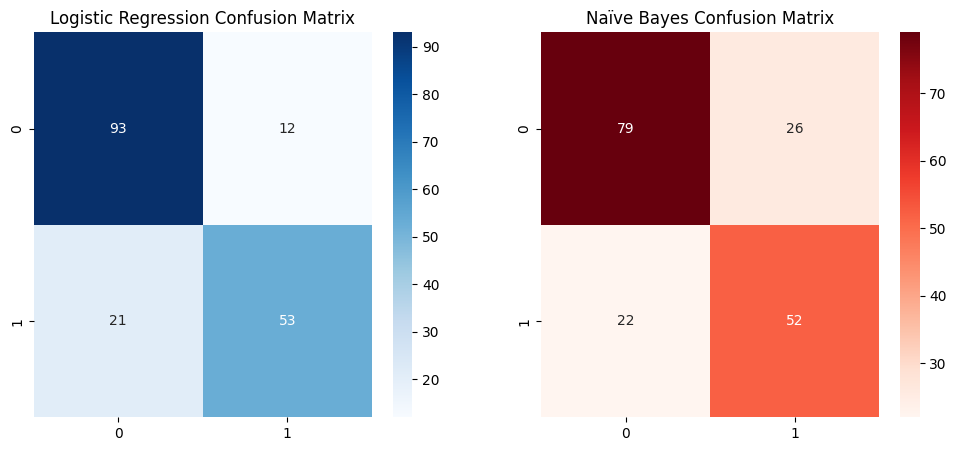

In [455]:
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title("Naïve Bayes Confusion Matrix")

plt.show()